<a href="https://colab.research.google.com/github/sangam0406/GEN-AI/blob/main/APPLE_LEAVE_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
import shutil

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import random
from sklearn.model_selection import train_test_split

import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
from torchvision.transforms import RandomHorizontalFlip, RandomRotation, ColorJitter
import warnings

In [ ]:
import numpy as np
import os
import cv2
from PIL import Image
from google.colab import drive  # Library for mounting Google Drive

# Mount Google Drive if needed (uncomment the following lines)
drive.mount('/content/gdrive')
image_directory = "/content/drive/MyDrive/Dataset_BUSI_with_GT"  # Replace with your folder path



def load_images(image_folder, label_value):
    images = [
        img
        for img in os.listdir(os.path.join(image_directory, image_folder))
        if img.split(".")[1] == "png" and "_mask" not in img
    ]
    for image_name in images:
        image_path = os.path.join(image_directory, image_folder, image_name)
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image = Image.fromarray(image, "RGB")
                image = image.resize((SIZE, SIZE))
                image = np.array(image)
                dataset.append(image)
                label.append(label_value)
        except FileNotFoundError:
            print(f"Error: File not found: {image_path}")

SIZE = 224
dataset = []
label = []

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
labels = ['APPLE ROT LEAVES', 'HEALTHY LEAVES', 'LEAF BLOTCH','SCAB LEAVES']
data_dir = '/content/gdrive/MyDrive/APPLE_DISEASE_DATASET'
# Create a figure to display the images
fig, axs = plt.subplots(9, 10, figsize=(18, 12))

# Desired width and height for each image
desired_width = 300  # Adjust as needed
desired_height = 300  # Adjust as needed

for i, label in enumerate(labels):
    label_dir = os.path.join(data_dir, label)

    # Get a list of image files
    image_files = [file for file in os.listdir(label_dir) if file.endswith('.jpg')]

    # Sort the list of image files
    image_files = sorted(image_files)
    for j in range(9):
        if j < len(image_files):
            # Load and resize the image
            image_path = os.path.join(label_dir, image_files[j])
            image = Image.open(image_path)
            image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            # Determine the label based on whether it's an image or a mask
            if j % 2 == 0:
                image_label = f'{label} - Image {j // 2 + 1}'
            else:
                image_label = f'{label} - Image {j // 2 + 1} Mask'

            # Display the image with the corresponding label
            axs[i, j].imshow(image)
            axs[i, j].set_title(image_label)
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

KeyError: 1

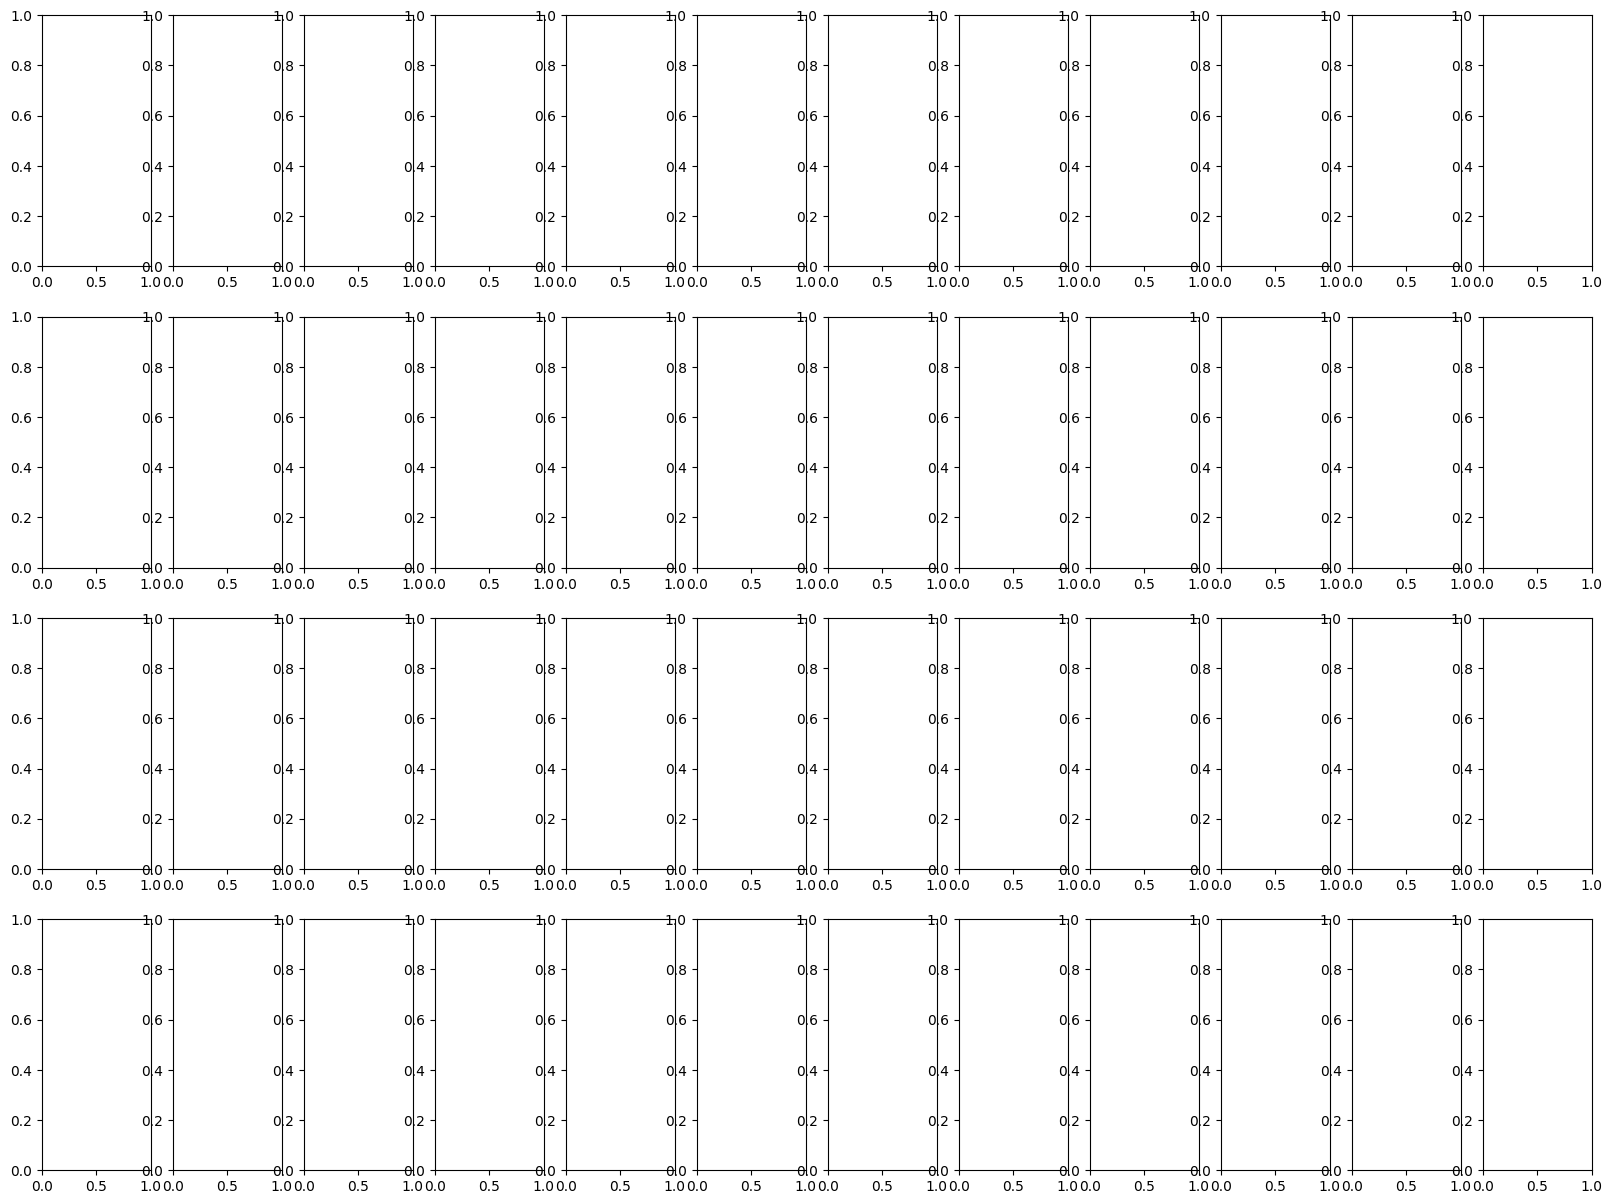

In [ ]:
import numpy as np
import os
import cv2
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt


# Alternatively, set the local data directory path if not using Google Drive
data_dir = "/content/gdrive/MyDrive/APPLE"  # Replace with your local path

# Define labels and image type mapping (modify as needed)
labels = ['APPLE ROT LEAVES', 'HEALTHY LEAVES', 'LEAF BLOTCH','SCAB LEAVES']
image_type_mapping = {
    0: "Image",
}

# Desired width and height for each image
desired_width = 500
desired_height = 500

# Create a figure to display the images
fig, axs = plt.subplots(len(labels),12, figsize=(20, 15))

try:
    for i, label in enumerate(labels):
        label_dir = os.path.join(data_dir, label)

        # Get a list of image files, handling potential errors gracefully
        try:
            image_files = [
                file
                for file in os.listdir(label_dir)
                if file.endswith(".jpg.jpeg")
            ]
            if not image_files:
                print(f"Warning: No images found for label '{label}'.")
                continue  # Skip to the next label if no images are found
        except FileNotFoundError:
            print(f"Error: Directory '{label_dir}' not found.")
            continue  # Skip to the next label if the directory is missing

        # Sort the list of image files (optional)
        image_files = sorted(image_files)

        for j in range(10):
            if j < len(image_files):
                # Determine the corresponding image type and image path
                image_type = (j + 1) % 2  # Alternate between image and mask (0 for image, 1 for mask)
                image_path = os.path.join(label_dir, image_files[j])

                # Load and resize the image
                try:
                    image = cv2.imread(image_path)  # Read using OpenCV
                    if image is not None:
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                        image = Image.fromarray(image)
                        image = image.resize((desired_width, desired_height), Image.LANCZOS)
                        image = np.array(image)
                except FileNotFoundError:
                    print(f"Error: File '{image_files[j]}' not found in '{label_dir}'.")
                    continue  # Skip to the next image within the current label

                # Construct a descriptive image label
                image_label = f"{label} - {image_type_mapping[image_type]} {j // 2 + 1}"

                # Display the image with the corresponding label
                axs[i, j].imshow(image)
                axs[i, j].set_title(image_label)
                axs[i, j].axis('off')

except OSError as e:
    print(f"An error occurred: {e}")  # Catch generic OS errors

plt.tight_layout()
plt.show()


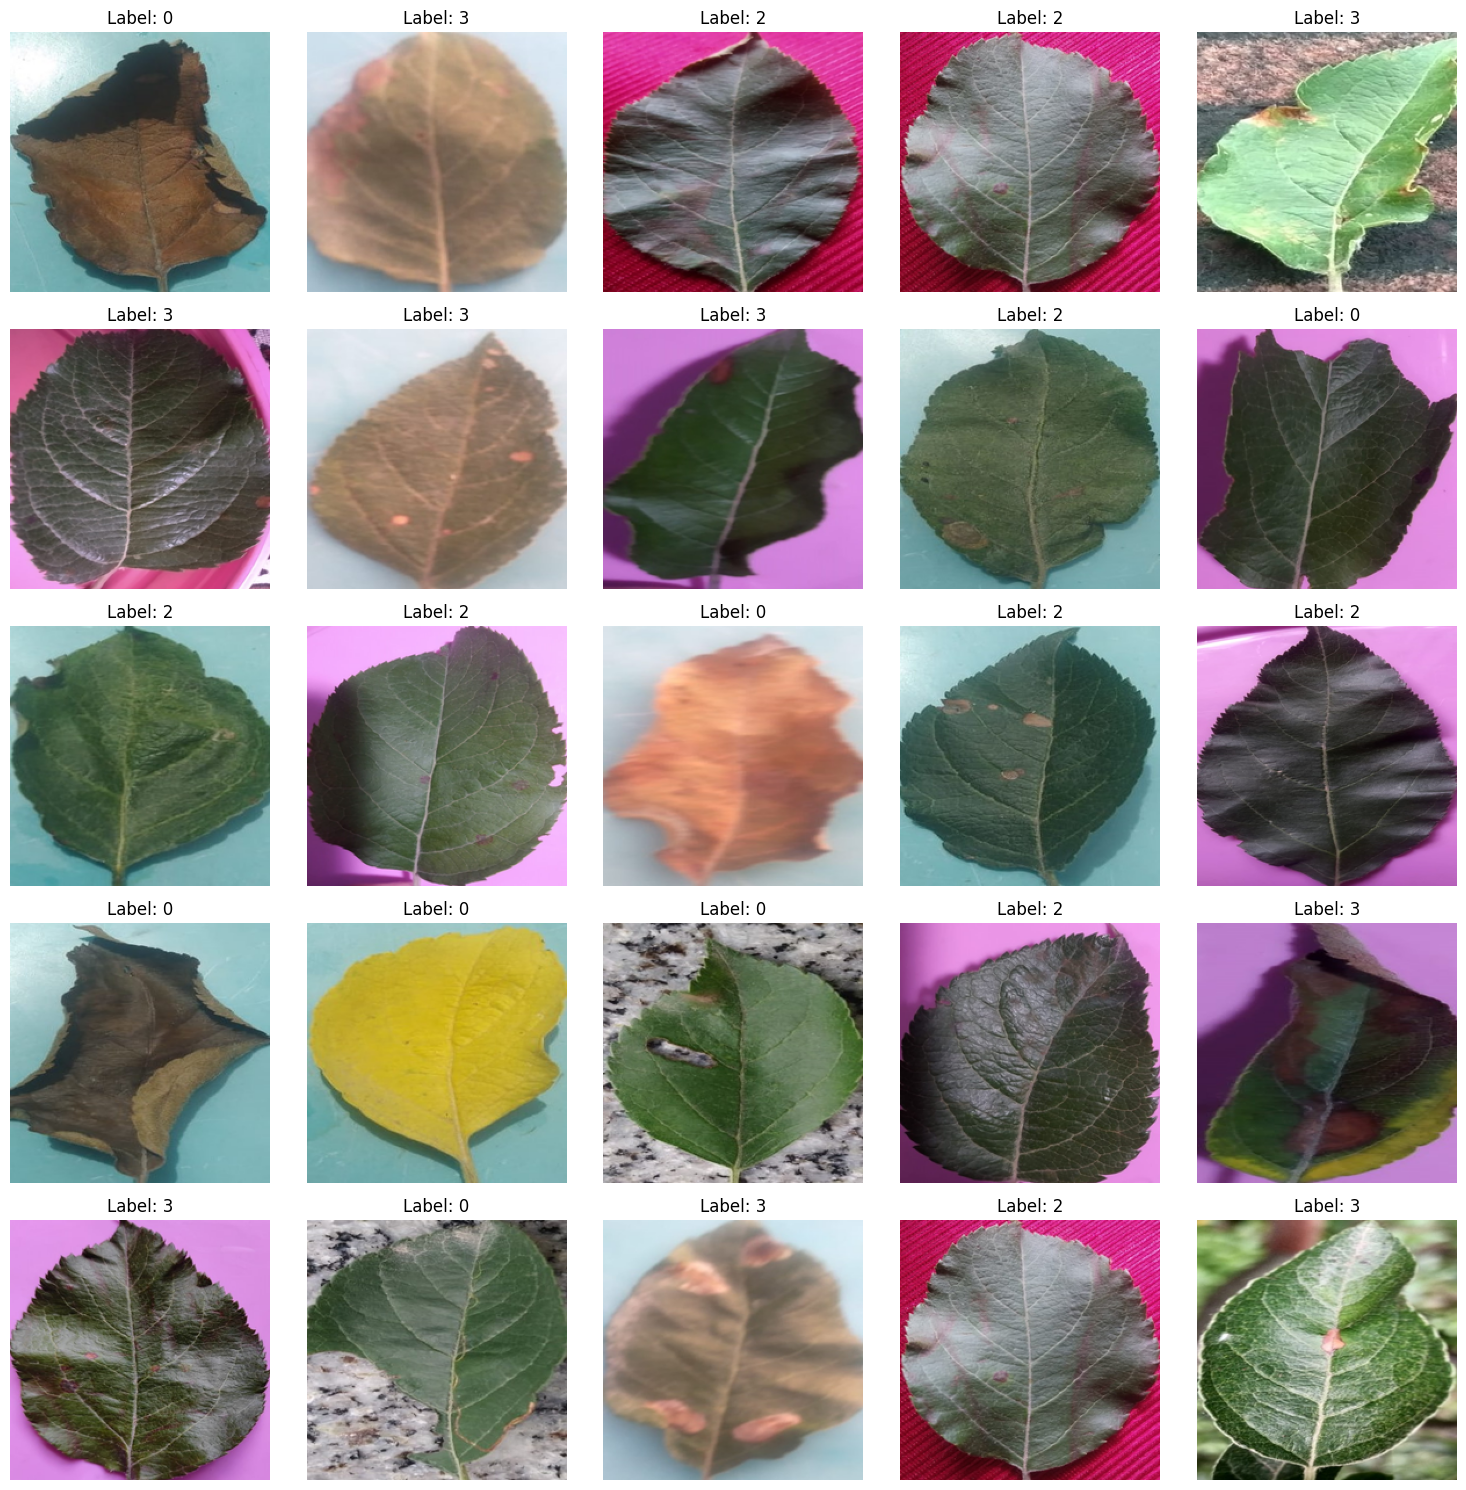

In [ ]:
import numpy as np
import os
import cv2
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive if needed (uncomment the following lines)
# drive.mount('/content/gdrive')
# image_directory = "/content/gdrive/My Drive/your_dataset_folder"  # Replace with your folder path

# Alternatively, use a local path
image_directory = "/content/gdrive/MyDrive/APPLE"  # Replace with your local path

def load_images(image_folder, label_value):
    images = [
        img
        for img in os.listdir(os.path.join(image_directory, image_folder))
        if img.split(".")[1] == "jpg"
    ]
    for image_name in images:
        image_path = os.path.join(image_directory, image_folder, image_name)
        try:
            image = cv2.imread(image_path)  # Read image using OpenCV
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for PIL
                image = Image.fromarray(image)
                # Resizing with antialiasing warning mitigation
                image = image.resize((SIZE, SIZE), resample=Image.LANCZOS)  # Use LANCZOS for smooth resizing
                image = np.array(image)
                dataset.append(image)
                label.append(label_value)
        except FileNotFoundError:
            print(f"Error: File not found: {image_path}")

SIZE = 224
dataset = []
label = []

load_images("APPLE ROT LEAVES", 0)  # Benign class with label 0
load_images("HEALTHY LEAVES", 1)  # Malignant class with label 1
load_images("LEAF BLOTCH", 2)
load_images("SCAB LEAVES", 3)    # Normal class with label 2
# Convert dataset and label to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

# Create a 4x4 grid to display 16 random images (adjust num_images as needed)
num_images = 25
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i in range(num_images):
    # Select a random index from the dataset
    random_index = np.random.randint(len(dataset))
    image = dataset[random_index]
    image_label = label[random_index]

    # Display the image with the corresponding label
    axs[i // 5, i % 5].imshow(image)
    axs[i // 5, i % 5].set_title(f"Label: {image_label}")
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()


In [ ]:

def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert(train_split+test_split+val_split)==1
  ds_size = len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=6)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
label = []
x = []
y = []

for i in li:
    label.append(i)
    for j in os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i):
        image = cv2.imread("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i+"/"+j)
        image = cv2.resize(image,(300,300))
        x.append(image)
        y.append(i)

x = np.array(x)
y = np.array(y)

NameError: name 'li' is not defined

In [ ]:
li = os.listdir("/content/gdrive/MyDrive/APPLE")
image_list=[]




In [ ]:
len(image_list)

0

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/APPLE'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1088.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1061.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1074.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1083.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1077.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1021.JPG.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1019.JPG.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1075.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1058.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1017.JPG.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1081.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/3015.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/2017.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/2099.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/3074.JPG.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/3084.jpg.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/3073.JPG.jpeg
/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/2078.j

In [ ]:
import cv2, os, shutil, math
from keras.layers import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:


def make_dataframes(sdir):
    bad_images = []
    good_ext = ['jpg', 'jpeg', 'png', 'tiff']
    filepaths = []
    labels = []
    classes = sorted(os.listdir(sdir))
    for klass in classes:
        classpath = os.path.join(sdir, klass)
        flist = sorted(os.listdir(classpath))
        desc = f'{klass:23s}'
        for f in tqdm(flist, ncols=110, desc=desc, unit='file', colour='blue'):
            fpath = os.path.join(classpath, f)
            fl = f.lower()
            index = fl.rfind('.')
            ext = fl[index + 1:]
            if ext in good_ext:
              try:
                    img = cv2.imread(fpath)
                    shape = img.shape
                    filepaths.append(fpath)
                    labels.append(klass)
              except:
                    bad_images.append(fpath)
                    print('defective image file: ', fpath)
            else:
                bad_images.append(fpath)
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)

    train_df, dummy_df = train_test_split(df, train_size=.8, shuffle=True, random_state=123, stratify=df['labels'])
    valid_df, test_df = train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123,
                                         stratify=dummy_df['labels'])
    classes = sorted(train_df['labels'].unique())
    class_count = len(classes)
    sample_df = train_df.sample(n=50, replace=False)

    ht = 0
    wt = 0
    count = 0
    for i in range(len(sample_df)):
        fpath = sample_df['filepaths'].iloc[i]
        try:
            img = cv2.imread(fpath)
            h = img.shape[0]
            w = img.shape[1]
            wt += w
            ht += h
            count += 1
        except:
            pass
    have = int(ht / count)
    wave = int(wt / count)
    aspect_ratio = have / wave
    print('number of classes in processed dataset= ', class_count)
    counts = list(train_df['labels'].value_counts())
    print('the maximum files in any class in train_df is ', max(counts),
          '  the minimum files in any class in train_df is ', min(counts))
    print('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio)
    return train_df, test_df, valid_df, classes, class_count

train_df, test_df, valid_df, classes, class_count = make_dataframes(sdir)

SCAB LEAVES            : 100%|████████████████████████████████████████████| 159/159 [00:02<00:00, 59.28file/s]


number of classes in processed dataset=  4
the maximum files in any class in train_df is  127   the minimum files in any class in train_df is  37
train_df length:  335   test_df length:  42   valid_df length:  42
average image height=  711   average image width=  371  aspect ratio h/w=  1.9164420485175202


In [ ]:
train_df

,filepaths,labels
376,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/5001...,SCAB LEAVES
12,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
278,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/1051...,SCAB LEAVES
225,/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/4018...,LEAF BLOTCH
120,/content/gdrive/MyDrive/APPLE/HEALTHY LEAVES/1...,HEALTHY LEAVES
...,...,...
362,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/4067...,SCAB LEAVES
275,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/1042...,SCAB LEAVES
0,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
81,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES


In [ ]:
valid_df

,filepaths,labels
299,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/3000...,SCAB LEAVES
354,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/4052...,SCAB LEAVES
350,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/4045...,SCAB LEAVES
206,/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/3072...,LEAF BLOTCH
388,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/5038...,SCAB LEAVES
406,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/5078...,SCAB LEAVES
32,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
86,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
78,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
151,/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/1021...,LEAF BLOTCH


In [ ]:
test_df

,filepaths,labels
240,/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/5035...,LEAF BLOTCH
366,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/4076...,SCAB LEAVES
104,/content/gdrive/MyDrive/APPLE/HEALTHY LEAVES/1...,HEALTHY LEAVES
49,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
100,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
110,/content/gdrive/MyDrive/APPLE/HEALTHY LEAVES/1...,HEALTHY LEAVES
36,/content/gdrive/MyDrive/APPLE/APPLE ROT LEAVES...,APPLE ROT LEAVES
247,/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/5059...,LEAF BLOTCH
167,/content/gdrive/MyDrive/APPLE/LEAF BLOTCH/2050...,LEAF BLOTCH
289,/content/gdrive/MyDrive/APPLE/SCAB LEAVES/2039...,SCAB LEAVES


In [ ]:
classes

['APPLE ROT LEAVES', 'HEALTHY LEAVES', 'LEAF BLOTCH', 'SCAB LEAVES']

In [ ]:
class_count

4

In [ ]:
sdir = '/content/gdrive/MyDrive/APPLE'

In [ ]:
n=200
batch_size = 32
working_dir=r'./'
img_size=(300, 300)
epochs = 50
input_shape = (300, 300, 3)

def balance(df, n, working_dir, img_size):
    df = df.copy()
    print('Initial length of dataframe is ', len(df))
    aug_dir = os.path.join(working_dir, 'aug')
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)

    for label in df['labels'].unique():
        dir_path = os.path.join(aug_dir, label)
        os.mkdir(dir_path)

    total = 0
    gen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, zoom_range=0.2)
    groups = df.groupby('labels')
    for label in df['labels'].unique():
        group = groups.get_group(label)
        sample_count = len(group)
        if sample_count < n:
            aug_img_count = 0
            delta = n - sample_count
            target_dir = os.path.join(aug_dir, label)
            msg = '{0:40s} for class {1:^30s} creating {2:^5s} augmented images'.format(' ', label, str(delta))
            print(msg, '\r', end='')  # prints over on the same line
            aug_gen = gen.flow_from_dataframe(group, x_col='filepaths', y_col=None, target_size=img_size,
                                              class_mode=None, batch_size=batch_size, shuffle=False,
                                              save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                              save_format='jpg')
            while aug_img_count < delta:
                images = next(aug_gen)
                aug_img_count += len(images)
            total += aug_img_count
    print('Total Augmented images created= ', total)
    aug_fpaths, aug_labels = [], []
    classlist = os.listdir(aug_dir)
    for target in classlist:
        classpath = os.path.join(aug_dir, target)
        flist = os.listdir(classpath)
        for f in flist:
            fpath = os.path.join(classpath, f)
            aug_fpaths.append(fpath)
            aug_labels.append(target)
    Fseries = pd.Series(aug_fpaths, name='filepaths')
    Lseries = pd.Series(aug_labels, name='labels')
    aug_df = pd.concat([Fseries, Lseries], axis=1)
    df = pd.concat([df, aug_df], axis=0).reset_index(drop=True)
    print('Length of augmented dataframe is ', len(df))
    return df


train_df = balance(train_df, n, working_dir, img_size)

Initial length of dataframe is  335
Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 127 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
